##### ORIGINAL CODE

https://www.kdnuggets.com/2020/09/visualization-covid-19-new-cases-over-time-python.html

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt
import pandas as pd
import csv
import datetime

from google.colab import drive
drive.mount('/content/gdrive')
%cd /content/gdrive/My Drive/UTS/CSS2/

reader = csv.reader(open('StatePopulations.csv'))

statePopulations = {}
for row in reader:
    key = row[0]
    if key in statePopulations:
        pass
    statePopulations[key] = row[1:]

filename = "us-states.csv"
fullTable = pd.read_csv(filename)
fullTable = fullTable.drop(['fips'], axis=1)
fullTable = fullTable.drop(['deaths'], axis=1)

# generate a list of the dates in the table
dates = fullTable['date'].unique().tolist()
states = fullTable['state'].unique().tolist()

result = pd.DataFrame()
result['date'] = fullTable['date']

states.remove('Northern Mariana Islands')
states.remove('Puerto Rico')
states.remove('Virgin Islands')
states.remove('Guam')

print(states)
states.sort()

for state in states:
    # create new dataframe with only the current state's date
    population = int(statePopulations[state][0])
    print(state + ": " + str(population))
    stateData = fullTable[fullTable.state.eq(state)]

    newColumnName = state
    stateData[newColumnName] = stateData.cases.diff()
    stateData[newColumnName] = stateData[newColumnName].replace(np.nan, 0)
    stateData = stateData.drop(['state'], axis=1)
    stateData = stateData.drop(['cases'], axis=1)

    stateData[newColumnName] = stateData[newColumnName].div(population)
    stateData[newColumnName] = stateData[newColumnName].mul(100000.0)

    result = pd.merge(result, stateData, how='left', on='date')

result = result.drop_duplicates()
result = result.fillna(0)

for state in states:
    result[state] = result[state].add(1.0)
    result[state] = np.log10(result[state])
    #result[state] = np.sqrt(result[state])

result['date'] = pd.to_datetime(result['date'])
result = result[result['date'] >= '2020-02-15']
result['date'] = result['date'].dt.strftime('%Y-%m-%d')

result.set_index('date', inplace=True)
result.to_csv("result.csv")
result = result.transpose()

plt.figure(figsize=(16, 10))
g = sns.heatmap(result, cmap="coolwarm", linewidth=0.05, linecolor='lightgrey')
plt.xlabel('')
plt.ylabel('')

plt.title("Daily New Covid-19 Cases Per 100k Of Population", fontsize=20)

updateText = "Updated " + str(datetime.date.today()) + \
    ". Scaled with Log(x+1) for improved contrast due to wide range of values. Data source: NY Times Github. Visualization by @JRBowling"

plt.suptitle(updateText, fontsize=8)

plt.yticks(np.arange(.5, 51.5, 1.0), states)

plt.yticks(fontsize=8)
plt.xticks(fontsize=8)
g.set_xticklabels(g.get_xticklabels(), rotation=90)
g.set_yticklabels(g.get_yticklabels(), rotation=0)
plt.savefig("covidNewCasesper100K.png")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive/My Drive/UTS/CSS2
['Washington', 'Illinois', 'California', 'Arizona', 'Massachusetts', 'Wisconsin', 'Texas', 'Nebraska', 'Utah', 'Oregon', 'Florida', 'New York', 'Rhode Island', 'Georgia', 'New Hampshire', 'North Carolina', 'New Jersey', 'Colorado', 'Maryland', 'Nevada', 'Tennessee', 'Hawaii', 'Indiana', 'Kentucky', 'Minnesota', 'Oklahoma', 'Pennsylvania', 'South Carolina', 'District of Columbia', 'Kansas', 'Missouri', 'Vermont', 'Virginia', 'Connecticut', 'Iowa', 'Louisiana', 'Ohio', 'Michigan', 'South Dakota', 'Arkansas', 'Delaware', 'Mississippi', 'New Mexico', 'North Dakota', 'Wyoming', 'Alaska', 'Maine', 'Alabama', 'Idaho', 'Montana', 'West Virginia']
Alabama: 4888949
Alaska: 738068
Arizona: 7123898
Arkansas: 3020327
California: 39776830
Colorado: 5684203
Connecticut: 3588683
Delaware: 971180
District of Columbia: 703608
Florida: 213122

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Illinois: 12768320
Indiana: 6699629
Iowa: 3160553
Kansas: 2918515
Kentucky: 4472265
Louisiana: 4682509
Maine: 1341582
Maryland: 6079602
Massachusetts: 6895917
Michigan: 9991177
Minnesota: 5628162
Mississippi: 2982785
Missouri: 6135888
Montana: 1062330
Nebraska: 1932549
Nevada: 3056824
New Hampshire: 1350575
New Jersey: 9032872
New Mexico: 2090708
New York: 19862512
North Carolina: 10390149
North Dakota: 755238
Ohio: 11694664
Oklahoma: 3940521
Oregon: 4199563
Pennsylvania: 12823989
Rhode Island: 1061712
South Carolina: 5088916
South Dakota: 877790
Tennessee: 6782564
Texas: 28704330
Utah: 3159345
Vermont: 623960
Virginia: 8525660
Washington: 7530552
West Virginia: 1803077
Wisconsin: 5818049
Wyoming: 573720


/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


##### ADAPTATION

https://github.com/M3IT/COVID-19_Data

https://www.abs.gov.au/statistics/people/population/national-state-and-territory-population/latest-release#data-download

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt
import pandas as pd
import csv
import datetime

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive", force_remount=True)

Mounted at /content/gdrive


In [ ]:
%cd /content/gdrive/My Drive/UTS/CSS2/

/content/gdrive/My Drive/UTS/CSS2


In [ ]:
reader = csv.reader(open('AU_population.csv'))

statePopulations = {}
for row in reader:
    key = row[0]
    if key in statePopulations:
        pass
    statePopulations[key] = row[1:]

In [ ]:
filename = "COVID_AU_state.csv"
fullTable = pd.read_csv(filename)
fullTable = fullTable.drop(['state_abbrev'], axis=1)
fullTable = fullTable.drop(['confirmed_cum'], axis=1)
fullTable = fullTable.drop(['deaths'], axis=1)
fullTable = fullTable.drop(['deaths_cum'], axis=1)
fullTable = fullTable.drop(['tests'], axis=1)
fullTable = fullTable.drop(['tests_cum'], axis=1)
fullTable = fullTable.drop(['positives'], axis=1)
fullTable = fullTable.drop(['positives_cum'], axis=1)
fullTable = fullTable.drop(['recovered'], axis=1)
fullTable = fullTable.drop(['recovered_cum'], axis=1)
fullTable = fullTable.drop(['hosp'], axis=1)
fullTable = fullTable.drop(['hosp_cum'], axis=1)
fullTable = fullTable.drop(['icu'], axis=1)
fullTable = fullTable.drop(['icu_cum'], axis=1)
fullTable = fullTable.drop(['vent'], axis=1)
fullTable = fullTable.drop(['vent_cum'], axis=1)
fullTable = fullTable.drop(['vaccines'], axis=1)
fullTable = fullTable.drop(['vaccines_cum'], axis=1)

In [ ]:
# generate a list of the dates in the table
dates = fullTable['date'].unique().tolist()
states = fullTable['state'].unique().tolist()

In [ ]:
print(dates)
print(states)

['1/03/2020', '2/03/2020', '3/03/2020', '4/03/2020', '5/03/2020', '6/03/2020', '7/03/2020', '8/03/2020', '9/03/2020', '10/03/2020', '11/03/2020', '12/03/2020', '13/03/2020', '14/03/2020', '15/03/2020', '16/03/2020', '17/03/2020', '18/03/2020', '19/03/2020', '20/03/2020', '21/03/2020', '22/03/2020', '23/03/2020', '24/03/2020', '25/03/2020', '26/03/2020', '27/03/2020', '28/03/2020', '29/03/2020', '30/03/2020', '31/03/2020', '1/04/2020', '2/04/2020', '3/04/2020', '4/04/2020', '5/04/2020', '6/04/2020', '7/04/2020', '8/04/2020', '9/04/2020', '10/04/2020', '11/04/2020', '12/04/2020', '13/04/2020', '14/04/2020', '15/04/2020', '16/04/2020', '17/04/2020', '18/04/2020', '19/04/2020', '20/04/2020', '21/04/2020', '22/04/2020', '23/04/2020', '24/04/2020', '25/04/2020', '26/04/2020', '27/04/2020', '28/04/2020', '29/04/2020', '30/04/2020', '1/05/2020', '2/05/2020', '3/05/2020', '4/05/2020', '5/05/2020', '6/05/2020', '7/05/2020', '8/05/2020', '9/05/2020', '10/05/2020', '11/05/2020', '12/05/2020', '13/

In [ ]:
result = pd.DataFrame()
result['date'] = fullTable['date']

In [ ]:
states.sort()

In [ ]:
for state in states:
    # create new dataframe with only the current state's date
    population = int(statePopulations[state][0])
    print(state + ": " + str(population))
    stateData = fullTable[fullTable.state.eq(state)]

    newColumnName = state
    stateData[newColumnName] = stateData.confirmed.diff()
    stateData[newColumnName] = stateData[newColumnName].replace(np.nan, 0)
    stateData = stateData.drop(['state'], axis=1)
    stateData = stateData.drop(['confirmed'], axis=1)

    stateData[newColumnName] = stateData[newColumnName].div(population)
    stateData[newColumnName] = stateData[newColumnName].mul(100000.0)

    result = pd.merge(result, stateData, how='left', on='date')

Australian Capital Territory: 431215
New South Wales: 8166369
Northern Territory: 246500
Queensland: 5184847
South Australia: 1770591
Tasmania: 541071
Victoria: 6680648
Western Australia: 2667130


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [ ]:
result = result.drop_duplicates()
result = result.fillna(0)

In [ ]:
for state in states:
    result[state] = result[state].add(1.0)
    result[state] = np.log10(result[state])
    #result[state] = np.sqrt(result[state])

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [ ]:
result['date'] = pd.to_datetime(result['date'])
result = result[result['date'] >= '2020-02-15']
result['date'] = result['date'].dt.strftime('%Y-%m-%d')

In [ ]:
result.set_index('date', inplace=True)
result.to_csv("result.csv")
result = result.transpose()

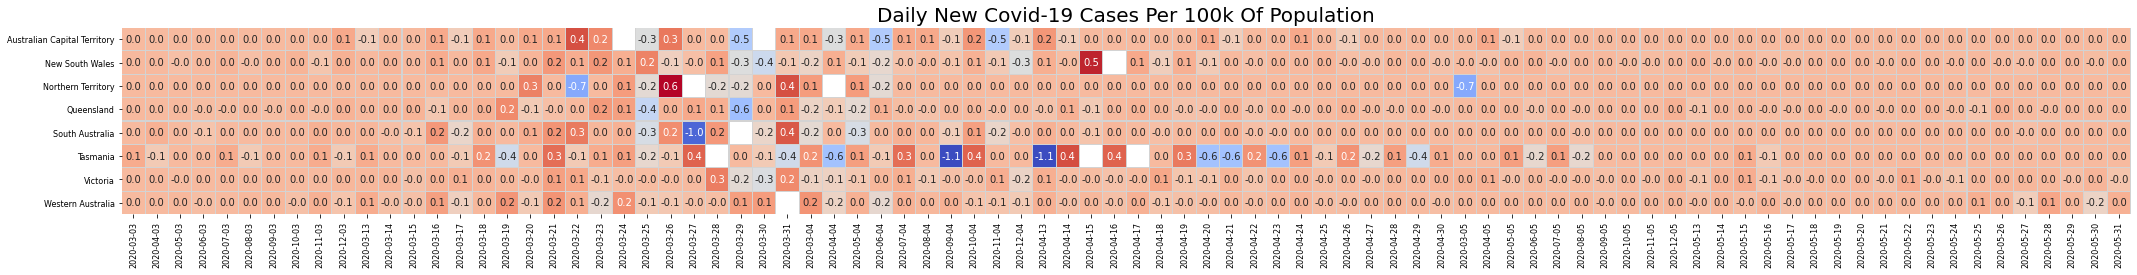

In [45]:
plt.figure(figsize=(36, 5))
g = sns.heatmap(result, cmap="coolwarm", annot=True, fmt=".1f", linewidth=0.05, linecolor='lightgrey', cbar=False, square=True)
plt.xlabel('')
plt.ylabel('')

plt.title("Daily New Covid-19 Cases Per 100k Of Population", fontsize=20)

plt.yticks(np.arange(.5, 8.5, 1.0), states)

plt.yticks(fontsize=8)
plt.xticks(fontsize=8)
g.set_xticklabels(g.get_xticklabels(), rotation=90)
g.set_yticklabels(g.get_yticklabels(), rotation=0)
plt.savefig("covidNewCasesper100K.png")